In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:

def euler(t, beta, gamma, s0, i0):
    dt = t[1] - t[0]

    s = np.zeros_like(t)
    i = np.zeros_like(t)
    iters_per_t = np.zeros_like(t)

    # War pocz.
    s[0] = s0
    i[0] = i0

    # Metoda niejawna Eulera
    MAX_ITER = 150
    TOL = 1e-6

    for n in range(t.shape[0] - 1):
        s_n = s[n]
        i_n = i[n]

        s_old = s_n
        i_old = i_n

        for iters_counter in range(MAX_ITER):
            s_new = s_n - dt * beta * s_old * i_old
            i_new = i_n + dt * (beta * s_old * i_old - gamma * i_old)

            if abs(s_new - s_old) < TOL and abs(i_new - i_old) < TOL:
                # Hit tolerance limit
                break

            s_old = s_new
            i_old = i_new

        s[n + 1] = s_new
        i[n + 1] = i_new
        iters_per_t[n + 1] = iters_counter

    axs = plt.subplots(3, 1)[1]
    ax = axs[0]
    ax.scatter(t, s, label='s', color='orange')
    ax.scatter(t, i, label='i', color='blue')
    ax.set_title("Euler, iter")
    ax.legend()

    r = 1 - s - i
    ax = axs[2]
    ax.plot(t, r)
    ax.set_ylabel("r(t)")
    ax.set_title("Euler, iter")

    ax = axs[1]
    ax.plot(t, iters_per_t)
    ax.set_ylabel("# Iterations")
    ax.set_title("Euler, iter")

    return s, i, iters_per_t

In [ ]:

def trapez(t, beta, gamma, s0, i0):
    dt = t[1] - t[0]

    s = np.zeros_like(t)
    i = np.zeros_like(t)
    iters_per_t = np.zeros_like(t)

    # War pocz.
    s[0] = s0
    i[0] = i0

    # Metoda niejawna Eulera
    MAX_ITER = 150
    TOL = 1e-6

    for n in range(t.shape[0] - 1):
        s_n = s[n]
        i_n = i[n]

        s_old = s_n
        i_old = i_n

        for iters_counter in range(MAX_ITER):
            s_new = s_n - dt * beta * s_old * i_old
            i_new = i_n + dt * (beta * s_old * i_old - gamma * i_old)

            if abs(s_new - s_old) < TOL and abs(i_new - i_old) < TOL:
                # Hit tolerance limit
                print(iters_counter, s_new, i_new)
                break

            s_old = s_new
            i_old = i_new

        s[n + 1] = s_new
        i[n + 1] = i_new
        iters_per_t[n + 1] = iters_counter

    axs = plt.subplots(3, 1)[1]
    ax = axs[0]
    ax.scatter(t, s, label='s', color='orange')
    ax.scatter(t, i, label='i', color='blue')
    ax.set_title("Euler, iter")
    ax.legend()

    r = 1 - s - i
    ax = axs[2]
    ax.plot(t, r)
    ax.set_ylabel("r(t)")
    ax.set_title("Euler, iter")

    ax = axs[1]
    ax.plot(t, iters_per_t)
    ax.set_ylabel("# Iterations")
    ax.set_title("Euler, iter")

    return s, i, iters_per_t

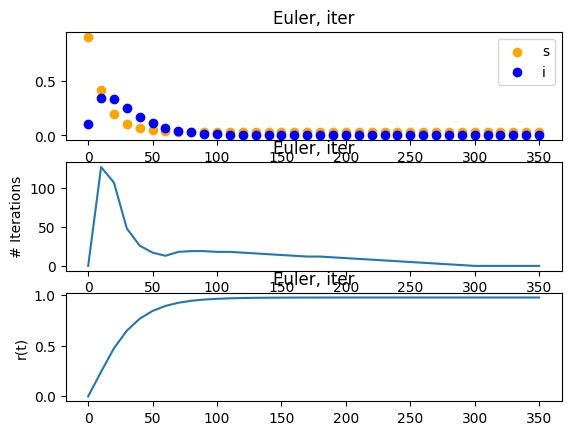

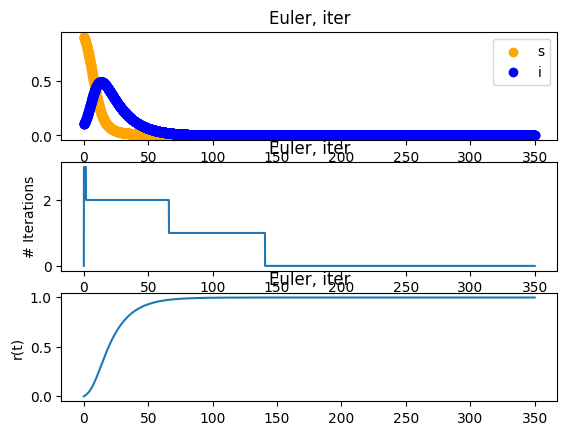

In [18]:
def wrapper():
    T_MAX = 350

    run_params = [
        {
            "dt": 10.,
            "beta": 0.34,
            "gamma": 0.07,
            "s0": 0.9,
            "i0": 0.1,
            "method": euler,
        },
        {
            "dt": 0.1,
            "beta": 0.34,
            "gamma": 0.07,
            "s0": 0.9,
            "i0": 0.1,
            "method": euler,
        }
    ]

    t_s_i_per_method = []
    iters_per_method = []

    for params in run_params:
        beta = params["beta"]
        gamma = params["gamma"]
        dt = params["dt"]
        t = np.arange(0, T_MAX + dt, dt)

        s0 = params["s0"]
        i0 = params["i0"]

        method = params["method"]
        s, i, iters_per_t = method(t, beta, gamma, s0, i0)

        t_s_i_per_method.append((t, s, t))
        iters_per_method.append((t, iters_per_t))

wrapper()


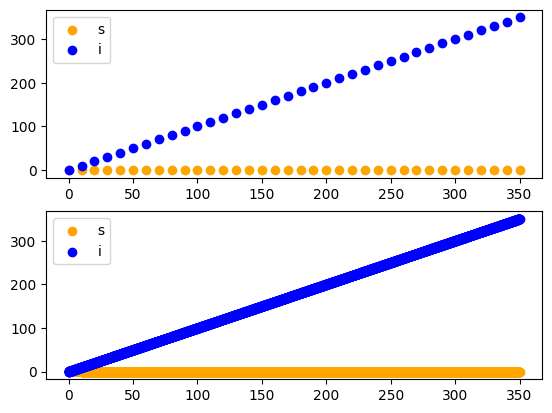

In [4]:
axs = plt.subplots(len(t_s_i_per_method), 1)[1]

for n in range(len(t_s_i_per_method)):
    t, s, i = t_s_i_per_method[n]
    ax = axs[n]
    ax.scatter(t, s, label='s', color='orange')
    ax.scatter(t, i, label='i', color='blue')
    ax.legend()


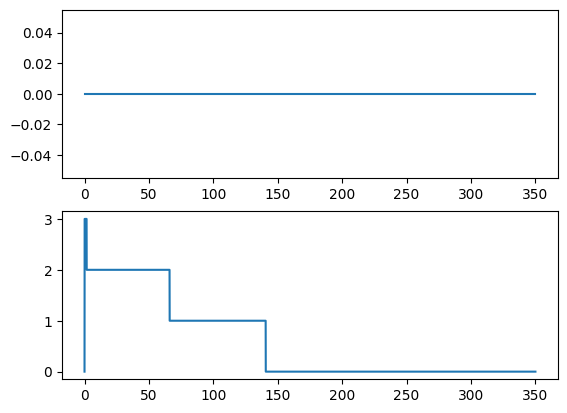

In [5]:
axs = plt.subplots(len(iters_per_method), 1)[1]

for n in range(len(iters_per_method)):
    t, iters = iters_per_method[n]
    ax = axs[n]
    ax.plot(t, iters)
